<a href="https://www.bigdatauniversity.com/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ESedX20816812-2022-01-01"><img src="https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width="400" align="center"></a>

<h1 align="center"><font size="5">Proyecto Final Coursera Capstone -  Agrupación y Segmentación de Vecindarios en la Ciudad de Toronto, Canadá</font></h1>

## Descripción

El propósito de este cuaderno es brindar apoyo en la elaboración del trabajo final correspondiente al Certificado Profesional de Ciencia de Datos de IBM. Este certificado abarca nueve cursos en total, culminando en el curso denominado "Ciencia de Datos Aplicada - Curso Capstone". El trabajo final que se desarrollará aquí forma parte integral de dicho curso capstone

### Para esta tarea, se le pedirá que explore y agrupe los vecindarios en Toronto.

Crear el código para rastrear la siguiente página de Wikipedia, https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M, para obtener los datos que están en la tabla de códigos postales y transformar los datos en un marco de datos de pandas

In [1]:
import pandas as pd
# Importar la librería pandas

# URL de la página
url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"

# Leer las tablas de la página utilizando pandas
# Esta función busca y extrae todas las tablas de la página y las almacena en una lista de DataFrames
tables = pd.read_html(url)

# Seleccionar la primera tabla de la lista (la tabla de interés)
table = tables[0]
# La variable 'table' ahora contiene el DataFrame correspondiente a la primera tabla en la página
table
# Imprimir el DataFrame para mostrar su contenido en la salida


,0,1,2,3,4,5,6,7,8
0,M1A Not assigned,M2A Not assigned,M3A North York (Parkwoods),M4A North York (Victoria Village),M5A Downtown Toronto (Regent Park / Harbourfront),M6A North York (Lawrence Manor / Lawrence Heig...,M7A Queen's Park (Ontario Provincial Government),M8A Not assigned,M9A Etobicoke (Islington Avenue)
1,M1B Scarborough (Malvern / Rouge),M2B Not assigned,M3B North York (Don Mills) North,M4B East York (Parkview Hill / Woodbine Gardens),"M5B Downtown Toronto (Garden District, Ryerson)",M6B North York (Glencairn),M7B Not assigned,M8B Not assigned,M9B Etobicoke (West Deane Park / Princess Gard...
2,M1C Scarborough (Rouge Hill / Port Union / Hig...,M2C Not assigned,M3C North York (Don Mills) South (Flemingdon P...,M4C East York (Woodbine Heights),M5C Downtown Toronto (St. James Town),M6C York (Humewood-Cedarvale),M7C Not assigned,M8C Not assigned,M9C Etobicoke (Eringate / Bloordale Gardens / ...
3,M1E Scarborough (Guildwood / Morningside / Wes...,M2E Not assigned,M3E Not assigned,M4E East Toronto (The Beaches),M5E Downtown Toronto (Berczy Park),M6E York (Caledonia-Fairbanks),M7E Not assigned,M8E Not assigned,M9E Not assigned
4,M1G Scarborough (Woburn),M2G Not assigned,M3G Not assigned,M4G East York (Leaside),M5G Downtown Toronto (Central Bay Street),M6G Downtown Toronto (Christie),M7G Not assigned,M8G Not assigned,M9G Not assigned
5,M1H Scarborough (Cedarbrae),M2H North York (Hillcrest Village),M3H North York (Bathurst Manor / Wilson Height...,M4H East York (Thorncliffe Park),M5H Downtown Toronto (Richmond / Adelaide / King),M6H West Toronto (Dufferin / Dovercourt Village),M7H Not assigned,M8H Not assigned,M9H Not assigned
6,M1J Scarborough (Scarborough Village),M2J North York (Fairview / Henry Farm / Oriole),M3J North York (Northwood Park / York University),M4J East York East Toronto (The Danforth East),M5J Downtown Toronto (Harbourfront East / Unio...,M6J West Toronto (Little Portugal / Trinity),M7J Not assigned,M8J Not assigned,M9J Not assigned
7,M1K Scarborough (Kennedy Park / Ionview / East...,M2K North York (Bayview Village),M3K North York (Downsview) East (CFB Toronto),M4K East Toronto (The Danforth West / Riverdale),M5K Downtown Toronto (Toronto Dominion Centre ...,M6K West Toronto (Brockton / Parkdale Village ...,M7K Not assigned,M8K Not assigned,M9K Not assigned
8,M1L Scarborough (Golden Mile / Clairlea / Oakr...,M2L North York (York Mills / Silver Hills),M3L North York (Downsview) West,M4L East Toronto (India Bazaar / The Beaches W...,M5L Downtown Toronto (Commerce Court / Victori...,M6L North York (North Park / Maple Leaf Park /...,M7L Not assigned,M8L Not assigned,M9L North York (Humber Summit)
9,M1M Scarborough (Cliffside / Cliffcrest / Scar...,M2M North York (Willowdale / Newtonbrook),M3M North York (Downsview) Central,M4M East Toronto (Studio District),M5M North York (Bedford Park / Lawrence Manor ...,M6M York (Del Ray / Mount Dennis / Keelsdale a...,M7M Not assigned,M8M Not assigned,M9M North York (Humberlea / Emery)


A continuación, se procesa los datos de la tabla de códigos postales y realiza transformaciones en las columnas PostalCode, Borough y Neighborhood según las reglas definidas en la función process_location. Luego filtra las filas donde Borough no sea "Not assigned" y devuelve el DataFrame resultante.

#### Para crear el marco de datos anterior:

●      El marco de datos constará de tres columnas: CódigoPostal, Municipio y Vecindario

●      Procese únicamente las celdas que tengan un municipio asignado.Ignore las celdas con un municipio que esté No asignado.

●      Puede existir más de un vecindario en un área de código postal.Por ejemplo, en la tabla de la página de Wikipedia, notará que M5A aparece dos veces y tiene dos vecindarios: Harbourfront y Regent Park.Estas dos filas se combinarán en una fila con los vecindarios separados con una coma como se muestra en la fila 11 en la tabla anterior.

●      Si una celda tiene un municipio, pero un vecindario No asignado, entonces el vecindario será el mismo que el municipio.

●      Limpie su Notebook y agregue celdas de Anotación para explicar su trabajo y cualquier suposición que esté haciendo.

●      En la última celda de su notebook, use el método .shape para imprimir el número de filas de su marco de datos.

In [2]:
import re

# Asignar el DataFrame 'table' a la variable 'df'
df = table

# Función para procesar la ubicación
def process_location(location):
    # Extraer el código postal
    postal_code = re.search(r'^\w{3}', location).group() if re.search(r'^\w{3}', location) else 'NA'
    
    # Encontrar el vecindario entre paréntesis
    neighborhood_match = re.search(r'\((.*?)\)', location)
    neighborhood = neighborhood_match.group(1) if neighborhood_match else 'NA'
    
    # Eliminar el código postal y el vecindario del texto para obtener el distrito (borough)
    borough = re.sub(r'\(.*?\)', '', location).replace(postal_code, '').replace(neighborhood, '').strip()
    
    # Reemplazar todas las barras '/' en el vecindario con comas ','
    neighborhood = re.sub(r'/', ',', neighborhood)
    
    return {'PostalCode': postal_code, 'Borough': borough, 'Neighborhood': neighborhood}

# Aplicar la función a todas las celdas del dataframe original, lo que generará una lista de diccionarios
df_processed = df.applymap(process_location)

# Convertir la lista de diccionarios en un DataFrame
processed_list = df_processed.stack().tolist()
result_df = pd.DataFrame(processed_list)

# Reemplazar "NA" en Neighborhood con los valores de Borough correspondientes
result_df['Neighborhood'] = result_df.apply(lambda row: row['Borough'] if row['Neighborhood'] == 'NA' else row['Neighborhood'], axis=1)

# Filtrar las filas donde Borough no sea "Not assigned"
result_df_filtered = result_df[result_df['Borough'] != 'Not assigned']
result_df_filtered.reset_index(drop=True, inplace=True)

# El resultado final es el DataFrame procesado y filtrado
result_df_filtered

,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park , Harbourfront"
3,M6A,North York,"Lawrence Manor , Lawrence Heights"
4,M7A,Queen's Park,Ontario Provincial Government
...,...,...,...
98,M8X,Etobicoke,"The Kingsway , Montgomery Road , Old Mill North"
99,M4Y,Downtown Toronto,Church and Wellesley
100,M7Y,East Toronto Business reply mail Processing Ce...,Enclave of M4L
101,M8Y,Etobicoke,"Old Mill South , King's Mill Park , Sunnylea ,..."


In [3]:
# Usar el método .shape en el DataFrame result_df_filtered
shape = result_df_filtered.shape
# La variable 'shape' contendrá una tupla con la cantidad de filas y columnas en el DataFrame

# Imprimir la información de la forma del DataFrame
print("Número de filas:", shape[0])
print("Número de columnas:", shape[1])

Número de filas: 103
Número de columnas: 3


### Obtener las coordenadas de latitud y longitud de cada vecindario.

Si no tiene instalado las librerias de 'geocoder', debe instalarlas con el comando `conda install -c conda-forge geocoder`

In [4]:
import geocoder

# Definición de la función para obtener coordenadas
def get_coordinates(postal_code):
    g = geocoder.arcgis('{}, Toronto, Ontario, Canada'.format(postal_code))
    lat_lng = g.latlng
    return lat_lng

# Realizar una copia del DataFrame result_df_filtered
result_df_copy = result_df_filtered.copy()

# Obtener las coordenadas para cada vecindario usando el código postal
result_df_copy[['Latitude', 'Longitude']] = result_df_copy.apply(lambda row: pd.Series(get_coordinates(row['PostalCode'])), axis=1)

# El DataFrame result_df_copy ahora contiene las coordenadas geográficas (latitud y longitud) para cada vecindario
result_df_copy

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753568,-79.329231
1,M4A,North York,Victoria Village,43.727292,-79.313085
2,M5A,Downtown Toronto,"Regent Park , Harbourfront",43.655201,-79.363016
3,M6A,North York,"Lawrence Manor , Lawrence Heights",43.722086,-79.450457
4,M7A,Queen's Park,Ontario Provincial Government,43.662437,-79.388758
...,...,...,...,...,...
98,M8X,Etobicoke,"The Kingsway , Montgomery Road , Old Mill North",43.654818,-79.509160
99,M4Y,Downtown Toronto,Church and Wellesley,43.666461,-79.381356
100,M7Y,East Toronto Business reply mail Processing Ce...,Enclave of M4L,43.662094,-79.322488
101,M8Y,Etobicoke,"Old Mill South , King's Mill Park , Sunnylea ,...",43.633104,-79.494682


### Agrupar los vecindarios de Toronto

In [5]:
# Agrupar los vecindarios por el nombre del distrito (Borough) y contar la cantidad de vecindarios en cada distrito
neighborhoods_grouped = result_df_copy.groupby('Borough')['Neighborhood'].count()

# Mostrar los resultados
print(neighborhoods_grouped)

Borough
Central Toronto                                                    9
Downtown Toronto                                                  17
Downtown Toronto Stn A PO Boxes 25 The Esplanade                   1
East Toronto                                                       4
East Toronto Business reply mail Processing Centre 969 Eastern     1
East York                                                          4
East York East Toronto                                             1
Etobicoke                                                         11
Etobicoke Northwest                                                1
Mississauga Canada Post Gateway Processing Centre                  1
North York                                                        16
North York  Central                                                1
North York  East                                                   1
North York  North                                                  1
North York  Northwest     

C:\Users\DIAZOVIEDO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


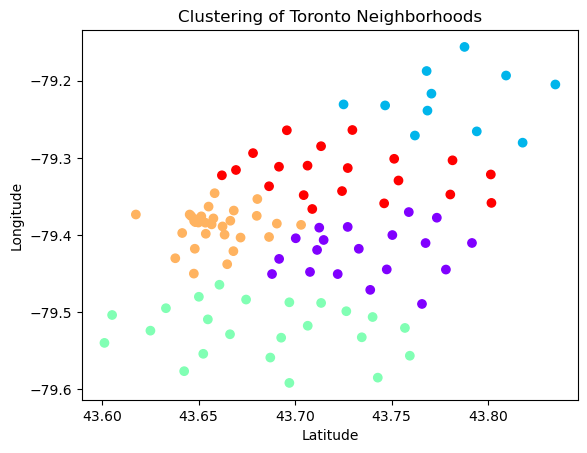

In [6]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import os

# Seleccionar características relevantes para el análisis de agrupamiento (en este caso, Latitud y Longitud)
features = result_df_copy[['Latitude', 'Longitude']]

# Configurar OMP_NUM_THREADS para evitar la advertencia sobre memoria en Windows con MKL
os.environ['OMP_NUM_THREADS'] = '1'

# Aplicar k-means para agrupar los vecindarios
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
result_df_copy['Cluster'] = kmeans.fit_predict(features)

# Visualizar los clústeres en un gráfico de dispersión
plt.scatter(result_df_copy['Latitude'], result_df_copy['Longitude'], c=result_df_copy['Cluster'], cmap='rainbow')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Clustering of Toronto Neighborhoods')
plt.show()

Anotaciones:

1. **Copia del DataFrame**: Se crea una copia del DataFrame `result_df_filtered` para evitar modificar los datos originales durante el proceso de análisis.

2. **Obtención de Coordenadas**: Se utilizó la función `get_coordinates` para obtener las coordenadas (latitud y longitud) de cada vecindario utilizando el código postal.

3. **Selección de Características**: En este caso, seleccionamos las características de latitud y longitud para el análisis de agrupamiento.

4. **Configuración de OMP_NUM_THREADS**: Se estableció la variable de entorno `OMP_NUM_THREADS` para evitar la advertencia sobre memoria en Windows con MKL.

5. **Aplicación de k-means**: Se aplicó el algoritmo KMeans con 5 clústeres a las características seleccionadas.

6. **Visualización de Resultados**: Se visualizaron los clústeres en un gráfico de dispersión para comprender mejor la distribución geográfica de los vecindarios en los diferentes clústeres.



### Generar mapas para visualizar sus vecindarios y cómo se agrupan.

Para generar mapas que visualicen los vecindarios y cómo se agrupan, podemos utilizar la librería `folium` en Python. `Folium` permite crear mapas interactivos que pueden mostrar marcadores, 

Primero, asegúrate de tener la librería `folium` instalada. Puedes instalarla usando el siguiente comando:

```bash
pip install folium
```

El siguiente código generar un mapa interactivo que muestra los vecindarios y sus clústeres:



Cada marcador muestra el nombre del vecindario y el número de clúster al que pertenece. Los marcadores se agrupan en clusters para una mejor visualización.

Después de ejecutar el código, se generará un archivo HTML llamado `toronto_neighborhoods_clusters.html` que puedes abrir en tu navegador para ver el mapa interactivo.

Recuerda que la ubicación y la distribución de los marcadores en el mapa dependen de las coordenadas geográficas reales que hayas obtenido para tus vecindarios y del análisis de clústeres que hayas realizado. Asegúrate de ajustar los datos y los parámetros según tus necesidades.

<a href="https://oscar1485.github.io/Capstone_Coursera/toronto_neighborhoods_clusters.html" target="_blank">Abrir enlace, para ver el mapa interactivo</a>




In [7]:
from IPython.display import display, HTML
import folium
from folium.plugins import MarkerCluster

# Crear un mapa centrado en Toronto
toronto_map = folium.Map(location=[43.70, -79.42], zoom_start=11)

# Agregar marcadores para los vecindarios con colores según el clúster
marker_cluster = MarkerCluster().add_to(toronto_map)

for idx, row in result_df_copy.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']], popup=f"Neighborhood: {row['Neighborhood']}\nCluster: {row['Cluster']}").add_to(marker_cluster)

# Generar el HTML del mapa
toronto_map_html = toronto_map._repr_html_()

# Mostrar el mapa en una celda directamente
display(HTML(toronto_map_html))